In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('player_201920.csv')

# Logistic regression

/var/folders/cf/h9k_2qts7r17120rrcfzvb6c0000gn/T/ipykernel_2186/3031057495.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'] = df['position'].apply(get_single_position)


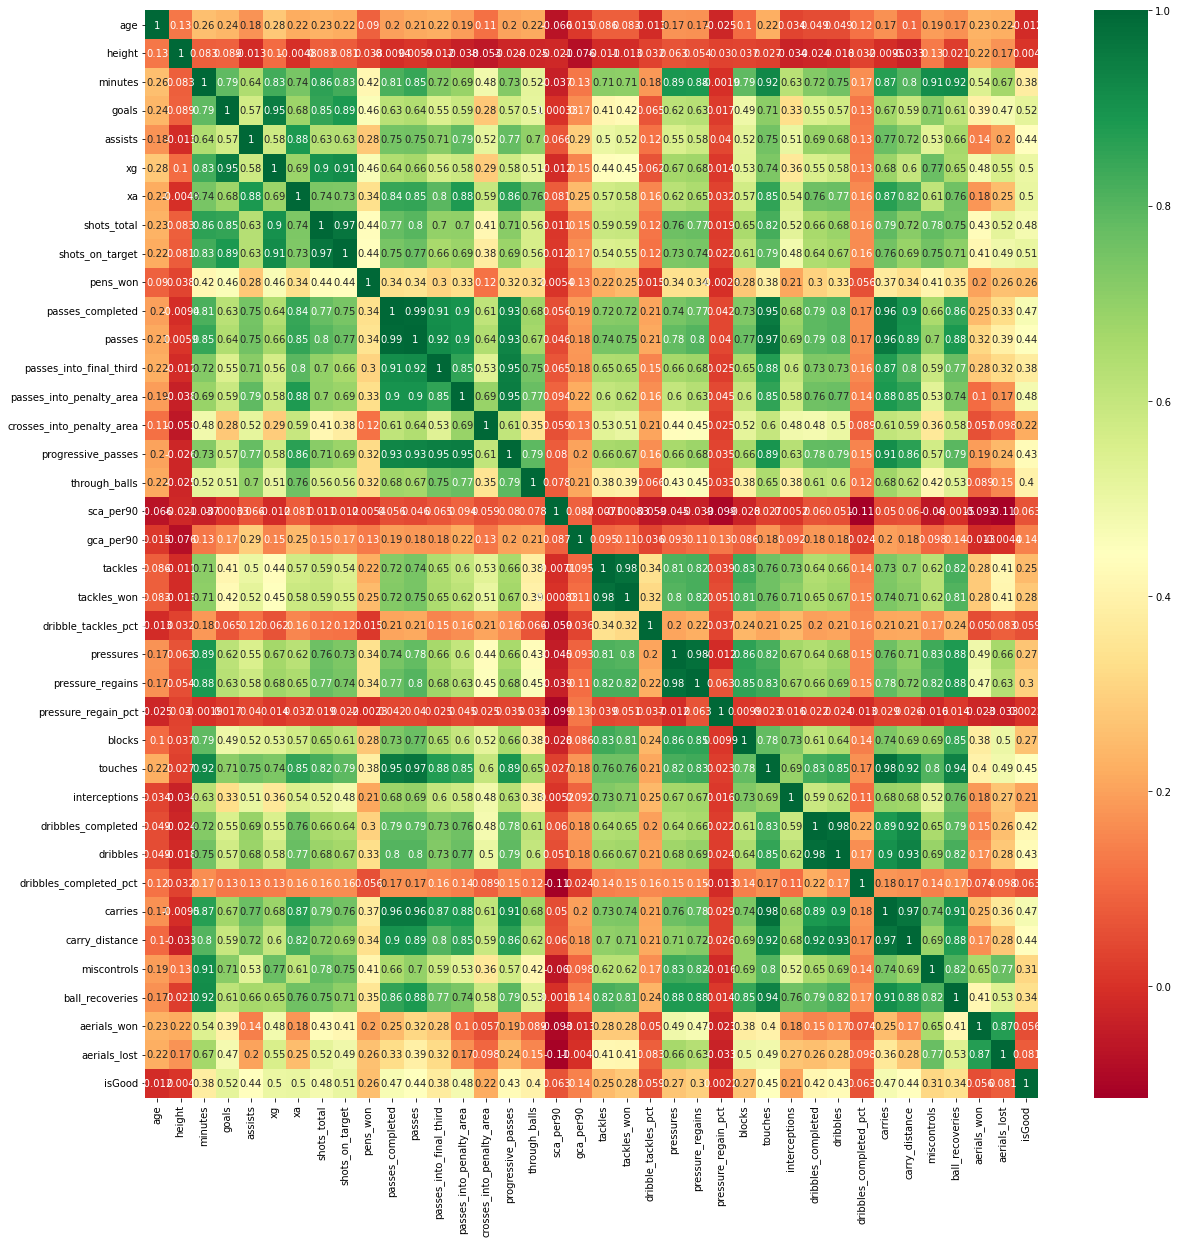

In [2]:
#selecting relevant features

features = ["position", "age", "value", "height", "minutes", "goals", "assists", "xg", "xa", "shots_total", "shots_on_target", "pens_won", "passes_completed", "passes", "passes_into_final_third", "passes_into_penalty_area", "crosses_into_penalty_area", "progressive_passes", "through_balls", "sca_per90", "gca_per90", "tackles", "tackles_won", "dribble_tackles_pct", "pressures", "pressure_regains", "pressure_regain_pct", "blocks", "touches", "interceptions", "dribbles_completed", "dribbles", "dribbles_completed_pct", "carries", "carry_distance", "miscontrols", "ball_recoveries", "aerials_won", "aerials_lost"]

df = data[features]

def get_single_position(pos):
    return pos.split(',')[0]

def is_player_good(value):
    return (0, 1)[value > 30000000]

df['position'] = df['position'].apply(get_single_position)

df = df.loc[df['position'] == 'FW']

df['isGood'] = df['value'].apply(is_player_good)

df = df.drop(['value'], axis = 1)
df = df.drop(['position'], axis = 1)

df
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [3]:
#Linear Regression
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

linreg = linear_model.LinearRegression()
labelencoder = LabelEncoder()

target = df['isGood']
df = df.drop(['isGood'], axis = 1)


#df['position'] = labelencoder.fit_transform(df['position'])

#df['league'] = labelencoder.fit_transform(df['league'])


#x = df.values # numpy array
#scaler = preprocessing.MinMaxScaler()
#df = scaler.fit_transform(x)
#X_norm = pd.DataFrame(x_scaled)



#80-20 training-testing data split. 20% of 2645 = 529
x_train = df[:-529]
y_train = target[:-529]
x_test = df[-529:]
y_test = target[-529:]

In [4]:
#normalization
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train.values)
x_test = scaler.transform(x_test)

In [5]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)

# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9300567107750473


[[472   3]
 [ 34  20]]


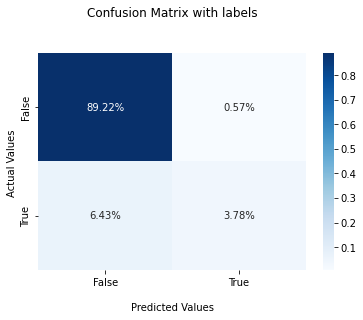

In [6]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)

print(cf_matrix)


ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# K-means clustering

In [7]:
#selecting relevant features

#features = ["player", "age", "value", "height", "minutes", "goals", "assists", "xg", "xa", "shots_total", "shots_on_target", "pens_won", "passes_completed", "passes", "passes_into_final_third", "passes_into_penalty_area", "crosses_into_penalty_area", "progressive_passes", "through_balls", "sca_per90", "gca_per90", "tackles", "tackles_won", "dribble_tackles_pct", "pressures", "pressure_regains", "pressure_regain_pct", "blocks", "touches", "interceptions", "dribbles_completed", "dribbles", "dribbles_completed_pct", "carries", "carry_distance", "miscontrols", "ball_recoveries", "aerials_won", "aerials_lost"]
df = data

df = df[df.value > 30000000]

#storing names and dataframe for k-means to plot later
player_names = df.player.tolist()

df = df.select_dtypes(['float64'])


#df = df.drop(['value'], axis = 1)
df = df.fillna(df.mean())

df
#corrmat = df.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
#g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,...,crosses_stopped_pct_gkm,def_actions_outside_pen_area_gkm,def_actions_outside_pen_area_per90_gkm,avg_distance_def_actions_gkm,Pts/G,xG,xGA,xGDiff,xGDiff/90,CLBestScorer
79,0.63,0.09,0.72,0.57,0.66,15.8,14.3,2.9,0.45,0.08,...,0.0,0.0,0.0,0.0,1.47,49.2,56.6,-7.3,-0.19,0.000000
80,0.08,0.00,0.08,0.08,0.08,0.5,0.5,0.3,0.04,0.02,...,0.0,0.0,0.0,0.0,1.47,49.2,56.6,-7.3,-0.19,0.000000
81,0.00,0.11,0.11,0.00,0.11,0.5,0.5,1.9,0.03,0.10,...,0.0,0.0,0.0,0.0,1.47,49.2,56.6,-7.3,-0.19,0.000000
83,0.00,0.05,0.05,0.00,0.05,0.6,0.6,1.2,0.03,0.06,...,0.0,0.0,0.0,0.0,1.47,49.2,56.6,-7.3,-0.19,0.000000
86,0.48,0.19,0.67,0.48,0.67,8.5,8.5,3.1,0.41,0.15,...,0.0,0.0,0.0,0.0,1.47,49.2,56.6,-7.3,-0.19,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.28,0.04,0.32,0.28,0.32,7.7,7.7,1.9,0.31,0.08,...,0.0,0.0,0.0,0.0,1.03,46.2,61.1,-14.8,-0.39,0.005747
2590,0.03,0.08,0.11,0.03,0.11,1.1,1.1,1.5,0.03,0.04,...,0.0,0.0,0.0,0.0,1.03,46.2,61.1,-14.8,-0.39,0.005747
2631,0.47,0.17,0.64,0.36,0.53,14.7,11.7,5.6,0.41,0.15,...,0.0,0.0,0.0,0.0,1.55,47.1,34.8,12.3,0.32,0.005747
2633,0.28,0.04,0.32,0.28,0.32,9.6,9.6,3.7,0.38,0.15,...,0.0,0.0,0.0,0.0,1.55,47.1,34.8,12.3,0.32,0.005747


In [13]:
#scaling and normalising the data

scaler = preprocessing.MinMaxScaler()

df_norm = scaler.fit_transform(df.values)

In [14]:
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced_df = pd.DataFrame(pca.fit_transform(df_norm))

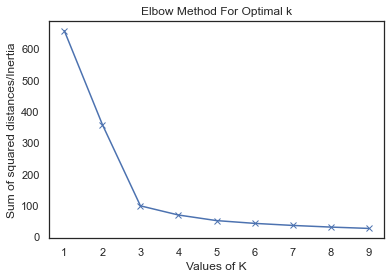

In [15]:
from sklearn.cluster import KMeans

#chosing the number of clusters
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(reduced_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
#actual algorithm

# specify the number of clusters
kmeans = KMeans(n_clusters=6)

# fit the input data
kmeans = kmeans.fit(reduced_df)

# get the cluster labels
labels = kmeans.predict(reduced_df)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

In [17]:
reduced_df['cluster'] = clusters

#just using last names to make the scatter plot less cluttered
player_names = [item.split()[-1] for item in player_names]

reduced_df['name'] = player_names
reduced_df.columns = ['x', 'y', 'cluster', 'name']
reduced_df.head()

,x,y,cluster,name
0,-0.605386,1.407319,0,Aubameyang
1,0.346913,-0.568278,4,BellerĂ­n
2,0.082565,-1.311242,3,Ceballos
3,0.372755,-0.998731,3,Guendouzi
4,-0.865918,1.525847,0,Lacazette


/Users/awais/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/awais/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0, flags=flags)


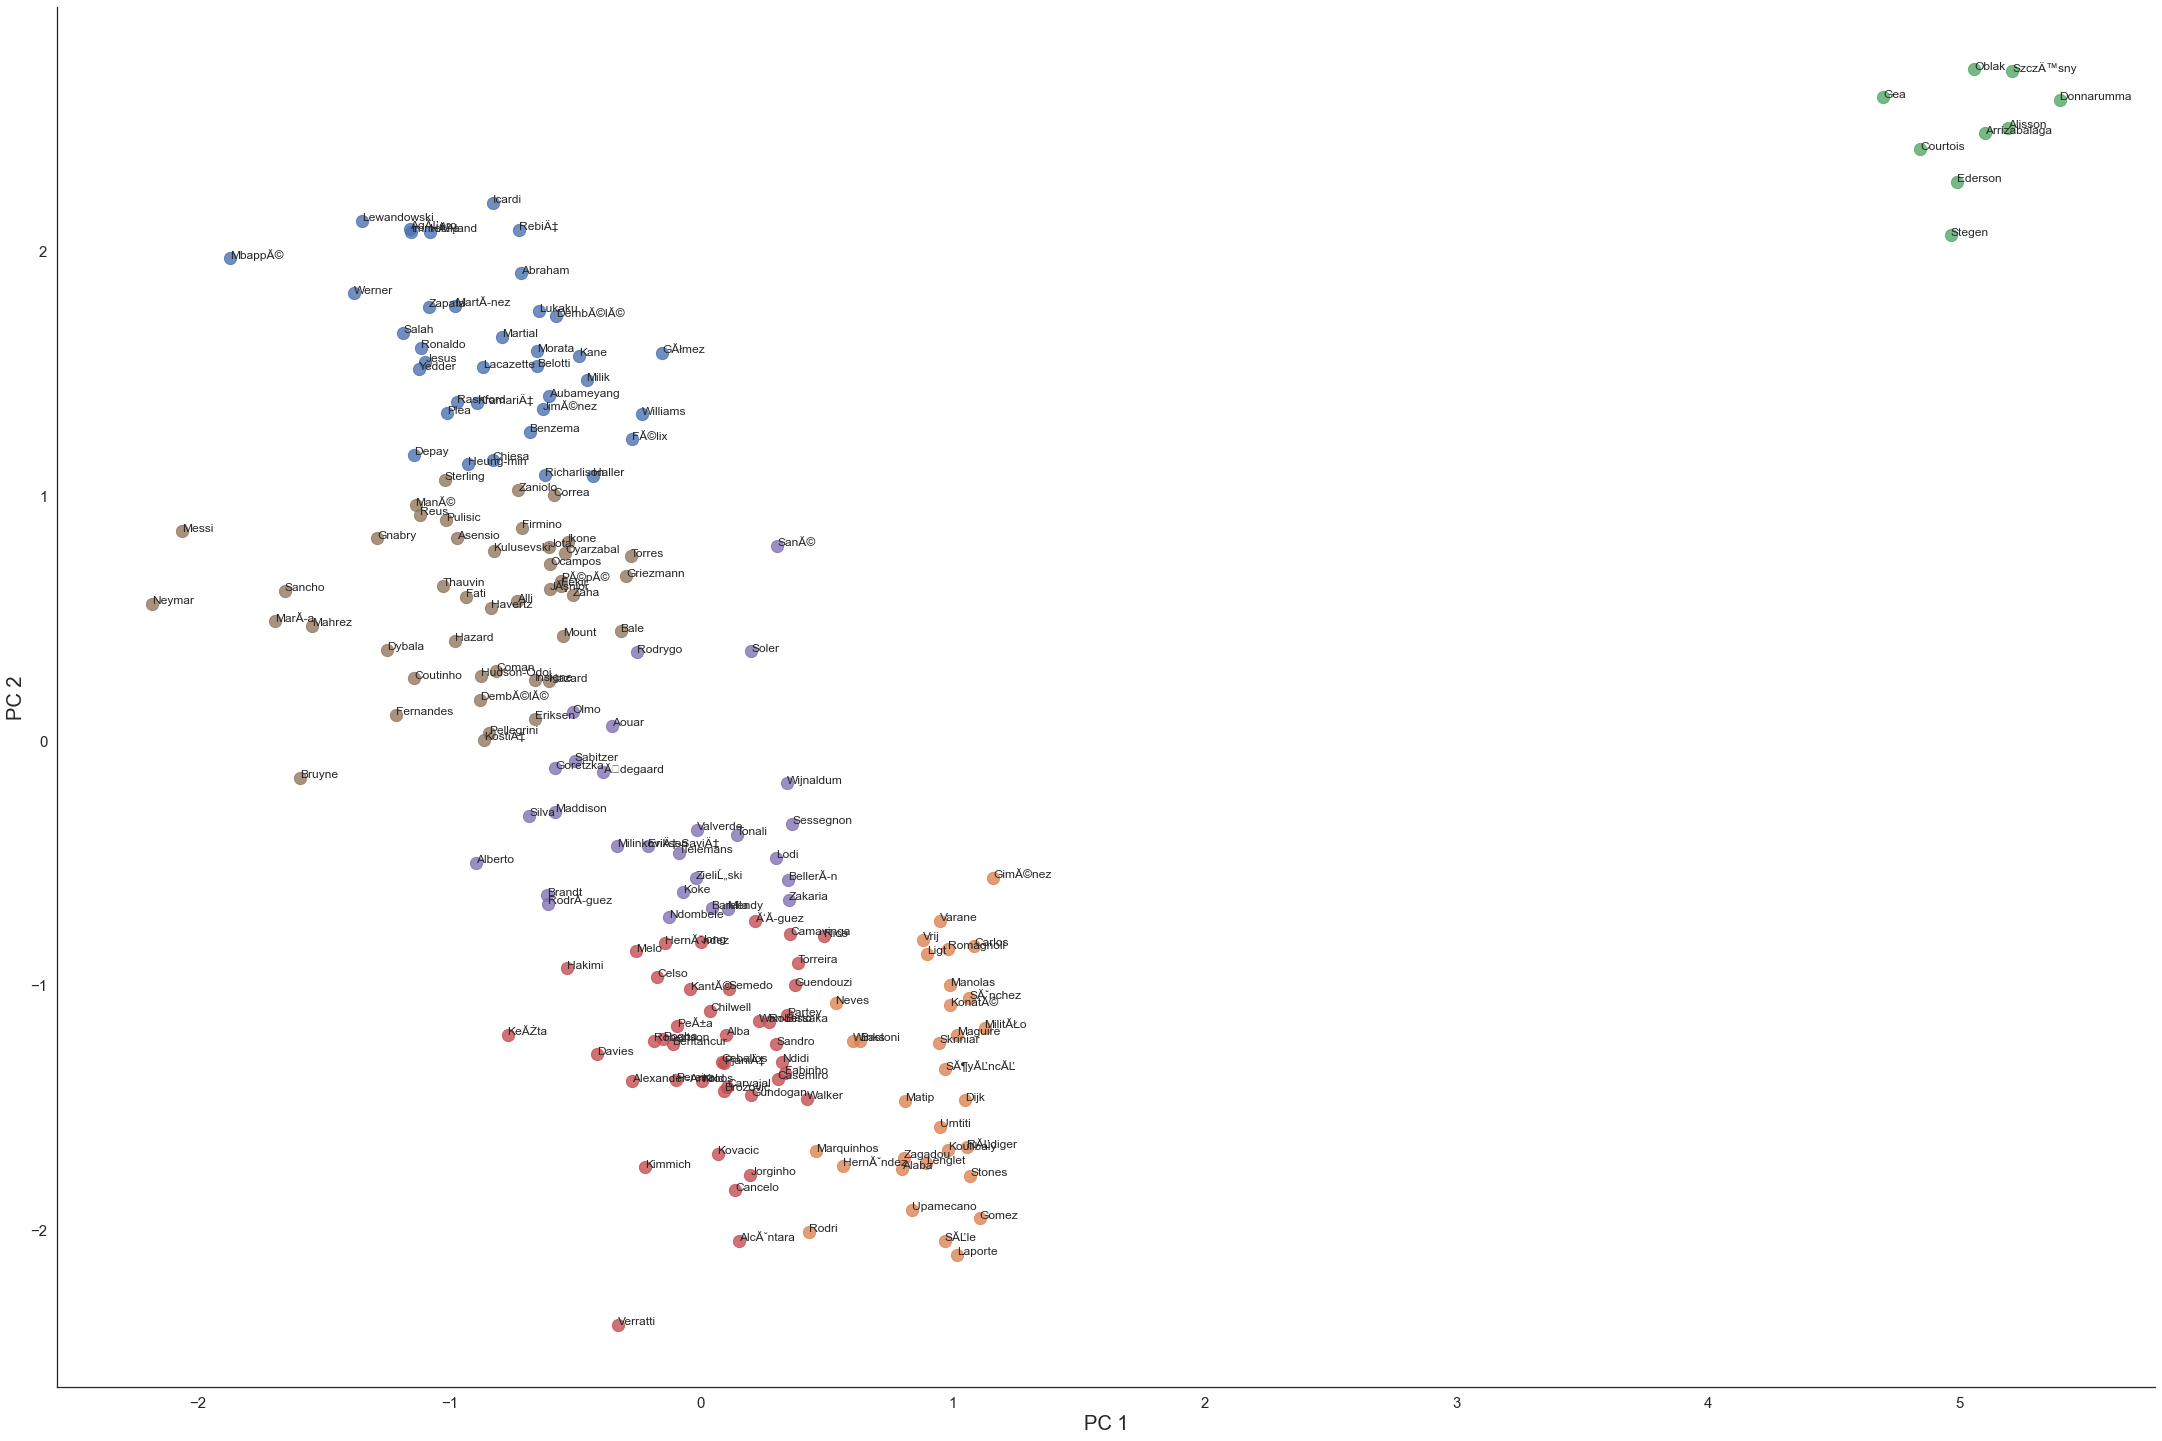

In [18]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_df, legend=False,
                   fit_reg=False, height = 20, aspect = 1.5, scatter_kws={"s": 150})

texts = []
for x, y, s in zip(reduced_df.x, reduced_df.y, reduced_df.name):
    texts.append(plt.text(x, y, s))

#ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()